<a href="https://colab.research.google.com/github/aruaru0/pytorch-tests/blob/main/Metric_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

In [3]:
train_dataset = torchvision.datasets.MNIST(root="data",
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)
valid_dataset = torchvision.datasets.MNIST(root="data",
                                           train=False,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

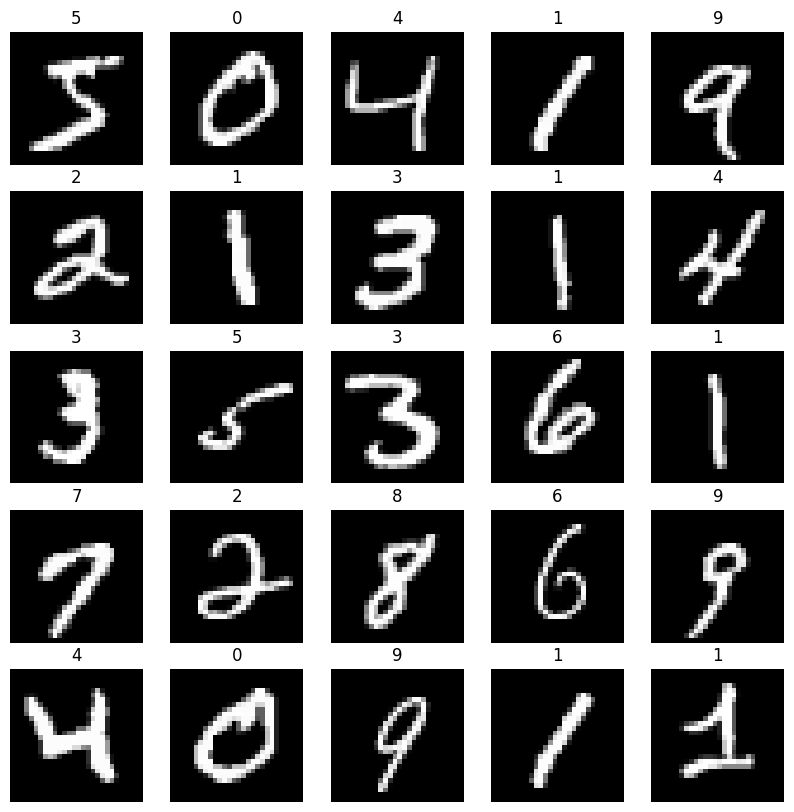

In [4]:
# データを確認
fig, ax = plt.subplots(5,5, figsize=(10,10))

for i in range(25) :
  img, label = train_dataset[i]
  r, c = i//5, i%5
  ax[r, c].imshow(img.squeeze(), cmap="gray")
  ax[r, c].axis("off")
  ax[r, c].set_title(label)


# データローダー

In [5]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# モデルの定義

In [6]:
class MyModel(nn.Module):
  def __init__(self, input_size):
    super(MyModel, self).__init__()
    self.size = input_size*input_size
    self.fc1 = nn.Linear(self.size, 1024)
    self.fc2 = nn.Linear(1024, 256)
    self.fc3 = nn.Linear(256, 10)
  def forward(self, x):
    x = x.view(-1, self.size)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = MyModel(28).to(device)
model

MyModel(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
def do_train(model, device, loader, criterion, optimizer):
  model.train()
  tot_loss = 0.0
  tot_score = 0.0
  for images, labels in tqdm(loader, desc="train"):
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    tot_loss += loss.detach().item()
    tot_score += accuracy_score(labels.cpu(), outputs.argmax(dim=1).cpu())

  tot_loss /= len(loader)
  tot_score /= len(loader)
  return tot_loss, tot_score

def do_valid(model, device, loader, criterion):
  model.eval()
  tot_loss = 0.0
  tot_score = 0.0
  with torch.no_grad():
    for images, labels in tqdm(loader, desc="valid"):
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      tot_loss += loss.detach().item()
      tot_score += accuracy_score(labels.cpu(), outputs.argmax(dim=1).cpu())
  tot_loss /= len(loader)
  tot_score /= len(loader)
  return tot_loss, tot_score

In [10]:
num_epochs = 10
for epoch in range(num_epochs):
  print(f'[EPOCH {epoch+1}]')
  train_loss, train_acc = do_train(model, device, train_loader, criterion, optimizer)
  valid_loss, valid_acc = do_valid(model, device, valid_loader, criterion)
  print(f"--> train loss {train_loss}, train accuracy {train_acc}, valid loss {valid_loss} valid accuracy {valid_acc}")

[EPOCH 1]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.2118129670274442, train accuracy 0.9369336353944563, valid loss 0.10916523102101437 valid accuracy 0.9669585987261147
[EPOCH 2]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.07856181208620161, train accuracy 0.9758462153518124, valid loss 0.0792401555401368 valid accuracy 0.973328025477707
[EPOCH 3]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.05310626494547308, train accuracy 0.9829424307036247, valid loss 0.07094386599445011 valid accuracy 0.9793988853503185
[EPOCH 4]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.03825843271205891, train accuracy 0.9874566897654584, valid loss 0.07169994531095017 valid accuracy 0.9792993630573248
[EPOCH 5]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.02958901926629004, train accuracy 0.9904717484008528, valid loss 0.06649321081747486 valid accuracy 0.9812898089171974
[EPOCH 6]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.02560813217125061, train accuracy 0.9916377931769723, valid loss 0.08832591004924742 valid accuracy 0.976015127388535
[EPOCH 7]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.019281853883644534, train accuracy 0.9937200159914712, valid loss 0.08576417056552589 valid accuracy 0.9772093949044586
[EPOCH 8]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.01899461510058016, train accuracy 0.994119802771855, valid loss 0.08025233384201222 valid accuracy 0.9799960191082803
[EPOCH 9]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.015369664897187866, train accuracy 0.9946861673773987, valid loss 0.09314361388732711 valid accuracy 0.9769108280254777
[EPOCH 10]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.01511628211026692, train accuracy 0.9949526918976546, valid loss 0.08773826963861675 valid accuracy 0.9800955414012739


In [11]:
model.fc3 = nn.Identity()
model.eval()

features = None
classes  = None

for images, labels in tqdm(valid_loader):
  with torch.no_grad():
    images = images.to(device)
    outputs = model(images)
  # print(outputs.shape)
  if classes is None:
    classes = labels.cpu()
  else:
    classes = torch.cat((classes, labels.cpu()))

  if features is None:
    features = outputs.cpu()
  else:
    features = torch.cat((features, outputs.cpu()))

  0%|          | 0/157 [00:00<?, ?it/s]

In [12]:
features.shape, classes.shape

(torch.Size([10000, 256]), torch.Size([10000]))

In [13]:
%%time
import umap
umap = umap.UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 57.7 s, sys: 2.04 s, total: 59.8 s
Wall time: 59.6 s


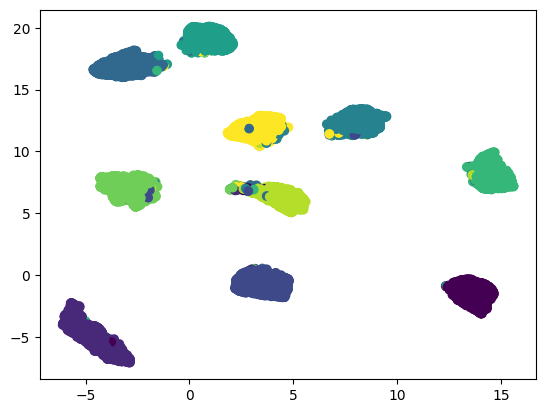

In [14]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=classes)
plt.show()

# Metric Learning

In [15]:
!pip install pytorch-metric-learning

In [16]:
from pytorch_metric_learning import losses

In [17]:
class MyModel(nn.Module):
  def __init__(self, input_size):
    super(MyModel, self).__init__()
    self.size = input_size*input_size
    self.fc1 = nn.Linear(self.size, 1024)
    self.fc2 = nn.Linear(1024, 256)
    # self.fc3 = nn.Linear(256, 256)
  def forward(self, x):
    x = x.view(-1, self.size)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    # x = self.fc3(x)
    return x

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = MyModel(28).to(device)
model

MyModel(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
)

In [19]:
# import torchvision.models as models
# model = models.resnet18()

# model.conv1 = nn.Conv2d(
#     in_channels=1,
#     out_channels=64,
#     kernel_size=model.conv1.kernel_size,
#     stride=model.conv1.stride,
#     padding=model.conv1.padding,
#     bias=False
# )
# out_features=256
# model.fc = nn.Linear(in_features=512, out_features=out_features)
# model = model.to(device)

In [20]:
metric = losses.ArcFaceLoss(num_classes=10, embedding_size=256, scale=64, margin=32).to(device)
optimizer = torch.optim.Adam(
    [{'params': model.parameters()}, {'params': metric.parameters()}],
    lr=0.001)

In [21]:
def do_train(model, device, loader, criterion, optimizer):
  model.train()
  tot_loss = 0.0
  for images, labels in tqdm(loader, desc="train"):
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    tot_loss += loss.detach().item()

  tot_loss /= len(loader)
  return tot_loss

def do_valid(model, device, loader, criterion):
  model.eval()
  tot_loss = 0.0
  with torch.no_grad():
    for images, labels in tqdm(loader, desc="valid"):
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      tot_loss += loss.detach().item()
  tot_loss /= len(loader)
  return tot_loss

In [22]:
num_epochs = 10
for epoch in range(num_epochs):
  print(f'[EPOCH {epoch+1}]')
  train_loss = do_train(model, device, train_loader, metric, optimizer)
  valid_loss = do_valid(model, device, valid_loader, metric)
  print(f"--> train loss {train_loss}, valid loss {valid_loss}")

[EPOCH 1]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 5.147040862818438, valid loss 2.6922044417521307
[EPOCH 2]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 2.139658360647709, valid loss 2.1662317582282458
[EPOCH 3]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 1.5604887032126449, valid loss 2.1791733942759697
[EPOCH 4]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 1.2896372738200343, valid loss 1.7482376819667642
[EPOCH 5]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 1.0262853796103988, valid loss 1.4859746411312862
[EPOCH 6]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.9036799792078938, valid loss 1.4417336387938806
[EPOCH 7]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.7622924974512651, valid loss 1.5443205821175203
[EPOCH 8]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.6940524687143044, valid loss 1.5629511453279488
[EPOCH 9]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.6143924978372818, valid loss 1.6087519845727651
[EPOCH 10]


train:   0%|          | 0/938 [00:00<?, ?it/s]

valid:   0%|          | 0/157 [00:00<?, ?it/s]

--> train loss 0.5379497259838797, valid loss 1.5460435811064317


In [23]:
model.eval()

features = None
classes  = None

for images, labels in tqdm(valid_loader):
  with torch.no_grad():
    images = images.to(device)
    outputs = model(images)
  # print(outputs.shape)
  if classes is None:
    classes = labels.cpu()
  else:
    classes = torch.cat((classes, labels.cpu()))

  if features is None:
    features = outputs.cpu()
  else:
    features = torch.cat((features, outputs.cpu()))

  0%|          | 0/157 [00:00<?, ?it/s]

In [24]:
features.shape, classes.shape

(torch.Size([10000, 256]), torch.Size([10000]))

In [25]:
%%time
import umap
umap = umap.UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 30.2 s, sys: 1.59 s, total: 31.8 s
Wall time: 47.5 s


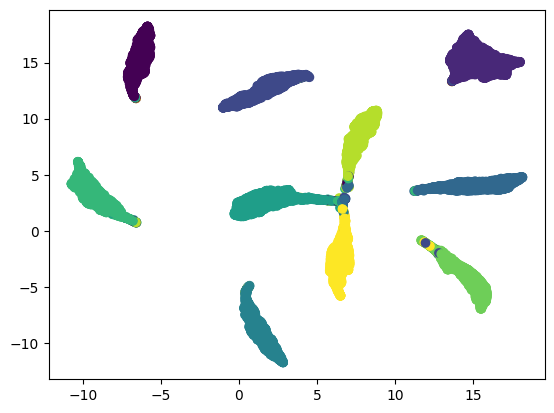

In [26]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=classes)
plt.show()

# 距離計算

In [27]:
images, labels = valid_loader.__iter__().__next__()

model.eval()
with torch.no_grad():
  images = images.to(device)
  features = model(images)

images.shape, labels.shape, features.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]), torch.Size([64, 256]))

In [28]:
# from pytorch_metric_learning.distances import BatchedDistance, CosineSimilarity

# def fn(mat, s, e):
#     print(f"At query indices {s}:{e}")

# distance = BatchedDistance(CosineSimilarity(), fn)

In [29]:
from pytorch_metric_learning.distances import CosineSimilarity
ret = CosineSimilarity()(features, features).cpu()

In [30]:
# 最初の文字とのコサイン距離が近いものを抽出する（閾値0.9）
print(f"label = {labels[0]}")
for i in range(64):
  if ret[0][i] > 0.9 :
    print("-"*40, end="")
  print(f"score = {float(ret[0][i]):.3f} label = {int(labels[i])}")

label = 7
----------------------------------------score = 1.000 label = 7
score = 0.018 label = 2
score = 0.019 label = 1
score = 0.014 label = 0
score = 0.000 label = 4
score = 0.022 label = 1
score = 0.000 label = 4
score = 0.000 label = 9
score = 0.000 label = 5
score = 0.000 label = 9
score = 0.007 label = 0
score = 0.010 label = 6
score = 0.000 label = 9
score = 0.016 label = 0
score = 0.025 label = 1
score = 0.003 label = 5
score = 0.000 label = 9
----------------------------------------score = 0.989 label = 7
score = 0.000 label = 3
score = 0.000 label = 4
score = 0.000 label = 9
score = 0.010 label = 6
score = 0.011 label = 6
score = 0.008 label = 5
score = 0.000 label = 4
score = 0.013 label = 0
----------------------------------------score = 0.945 label = 7
score = 0.000 label = 4
score = 0.017 label = 0
score = 0.036 label = 1
score = 0.027 label = 3
score = 0.024 label = 1
score = 0.031 label = 3
score = 0.019 label = 4
----------------------------------------score = 0.960 

# FAISSを使ってベクトル登録

In [31]:
!pip install faiss-cpu
# GPUを使う場合は
# !pip install faiss-gpu

In [32]:
import faiss
import random

## INDEXを作成

In [77]:
dim = 256
nlist = 10
m = 32
nbits = 8

#quantizer = faiss.IndexFlatL2(dim)
quantizer = faiss.IndexFlatIP(dim)

# index = faiss.IndexIVFFlat(quantizer, dim, nlist, faiss.METRIC_INNER_PRODUCT)
index = faiss.IndexIVFPQ(quantizer, dim, nlist, m, nbits, faiss.METRIC_INNER_PRODUCT)

In [78]:
# 訓練データの特徴量とラベルを全て抜き出す

model.eval()

features = None
classes  = None

for images, labels in tqdm(train_loader):
  with torch.no_grad():
    images = images.to(device)
    outputs = model(images)
    outputs = (outputs.transpose(1,0)/outputs.norm(dim=1)).transpose(1,0)
  if classes is None:
    classes = labels.cpu()
  else:
    classes = torch.cat((classes, labels.cpu()))

  if features is None:
    features = outputs.cpu()
  else:
    features = torch.cat((features, outputs.cpu()))

  0%|          | 0/938 [00:00<?, ?it/s]

In [79]:
# 圧縮のために一部のデータで特徴量の分布を学習させる
train_data = np.array([v for v in  features if random.random() < 0.01])
index.train(train_data)

In [80]:
# 10000個毎に追加：細切れで追加可能なので、後から追加も可能
batch_size = 10000
for i in range(0, len(classes), batch_size):
    input_vecs = []
    input_ids = []
    for item_id, vec in zip(classes[i:i+batch_size], features[i:i+batch_size]):
        input_vecs.append(vec)
        input_ids.append(item_id)
    input_vecs = np.array(input_vecs, dtype=np.float32)
    input_ids = np.array(input_ids, dtype=np.int64)
    index.add_with_ids(input_vecs, input_ids)

In [81]:
# 作成したインデックスを保存
faiss.write_index(index, "features.index")

## INDEXを利用

In [82]:
# インデックスを使って近傍検索を行う

# 検証データから最初の64個を取り出して特徴量を生成
images, labels = valid_loader.__iter__().__next__()
model.eval()
with torch.no_grad():
  images = images.to(device)
  features = model(images)
  features = (features.transpose(1,0)/features.norm(dim=1)).transpose(1,0)

# 保存したインデックスを読み込む
index = faiss.read_index("features.index")

D, I = index.search(features.cpu().numpy(), 3) # 近傍３個を取得（D: distance, I: index）

for label, idx, dist in zip(labels, I, D):
  print(f"正解={label}, 検索結果(上位3位) = {idx}, 距離={dist}")

正解=7, 検索結果(上位3位) = [7 7 7], 距離=[1.0112848 1.0077612 1.0076492]
正解=2, 検索結果(上位3位) = [2 2 2], 距離=[1.0149219 1.0135362 1.0133244]
正解=1, 検索結果(上位3位) = [1 1 1], 距離=[1.0119952 1.0108466 1.0093753]
正解=0, 検索結果(上位3位) = [0 0 0], 距離=[1.0442381 1.0100461 1.0092627]
正解=4, 検索結果(上位3位) = [4 4 4], 距離=[1.011951  1.0065445 1.006035 ]
正解=1, 検索結果(上位3位) = [1 1 1], 距離=[1.0128698 1.0095211 1.0091816]
正解=4, 検索結果(上位3位) = [4 4 4], 距離=[1.0130725 1.0105096 1.0068108]
正解=9, 検索結果(上位3位) = [9 9 9], 距離=[0.9862113  0.9724981  0.96998906]
正解=5, 検索結果(上位3位) = [5 5 5], 距離=[0.73821235 0.7217237  0.71698916]
正解=9, 検索結果(上位3位) = [9 9 9], 距離=[1.0110637 1.0048431 1.0021498]
正解=0, 検索結果(上位3位) = [0 0 0], 距離=[1.01832   1.0179038 1.0146782]
正解=6, 検索結果(上位3位) = [6 6 6], 距離=[1.0123885 1.0107207 1.0086939]
正解=9, 検索結果(上位3位) = [9 9 9], 距離=[1.0039049 1.0038358 1.0024631]
正解=0, 検索結果(上位3位) = [0 0 0], 距離=[1.0155842 1.015381  1.0143192]
正解=1, 検索結果(上位3位) = [1 1 1], 距離=[1.0139121 1.0108563 1.0093565]
正解=5, 検索結果(上位3位) = [5 5 5], 距離=[1.0348874 1.02258

In [75]:
torch.dot(features[2], features[5])

tensor(0.9946)

In [76]:
labels

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])